In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

In [ ]:
data = pd.read_csv("/content/Financial Analytics data.csv")

In [ ]:
data.head(100)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
95,96,Bajaj Holdings,30305.94,NaN,317.85
96,97,P & G Hygiene,30202.12,NaN,704.16
97,98,MRF,30030.01,NaN,3798.82
98,99,Shriram Trans.,29327.64,NaN,3087.67


In [ ]:
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [ ]:
data.shape

(488, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [ ]:
data.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4'], dtype='object')

In [ ]:
data1 = data.drop('Unnamed: 4',axis = 1)


As there are more than 80% columns are null values in last column and we neither have any information about last column which is also unnamed . So firstly we will start with other columns and think about it later.

In [ ]:
data1.columns = ['S.No.', 'Name','Market Cap(Cr)','Sales Quarterly(Cr)']

In [ ]:
null_data = data1              #it is data which contains null values or raw data with deleted column
data1

,S.No.,Name,Market Cap(Cr),Sales Quarterly(Cr)
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.No.                488 non-null    int64  
 1   Name                 488 non-null    object 
 2   Market Cap(Cr)       479 non-null    float64
 3   Sales Quarterly(Cr)  365 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


<ipython-input-13-5678e7b65e5e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1["Market Cap(Cr)"])


<Axes: xlabel='Market Cap(Cr)', ylabel='Density'>

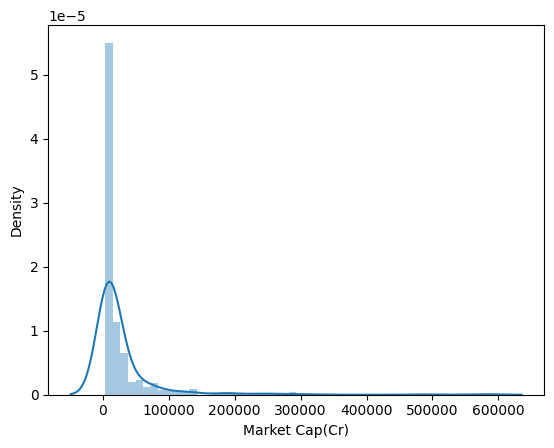

In [ ]:
sns.distplot(data1["Market Cap(Cr)"])

<Axes: ylabel='Market Cap(Cr)'>

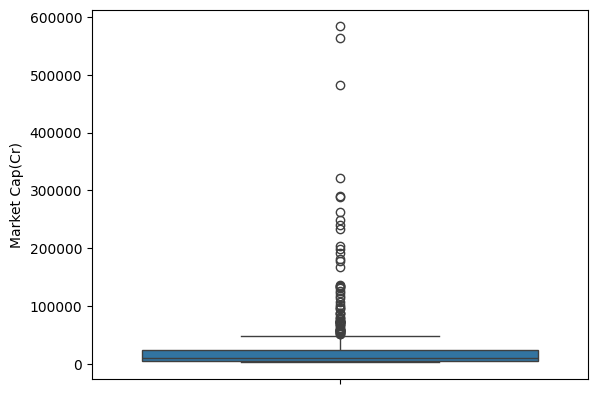

In [ ]:
sns.boxplot(data1['Market Cap(Cr)'])

It is observed that it is right skewed distribution and there are also some outliers in the data, so using median to fill null values would be appropriate but it is better to observe difference between mean and median using histogram.

In [ ]:
mn = data1['Market Cap(Cr)'].mean()
md = data1['Market Cap(Cr)'].median()
print(f"Mean = {mn},\nMedian = {md}")

Mean = 28043.857118997912,
Median = 9885.05


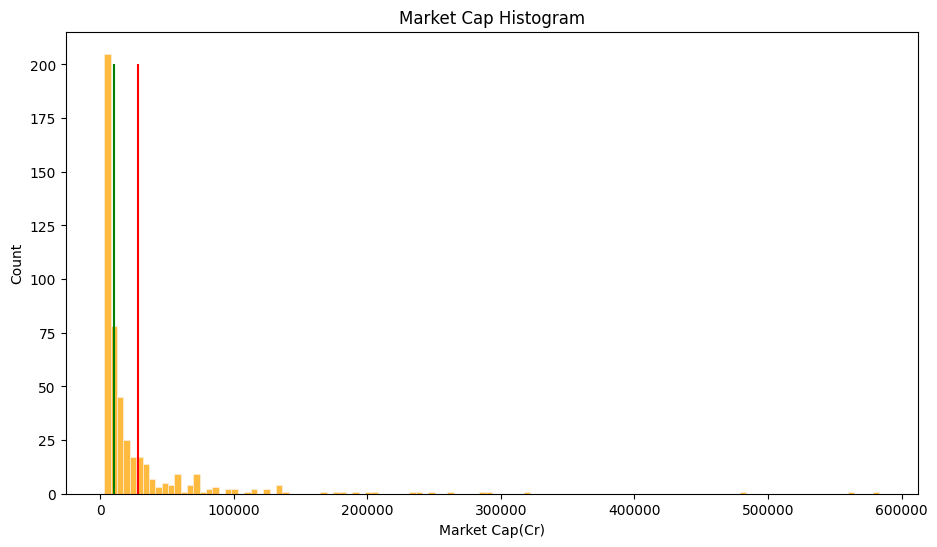

In [ ]:
plt.figure(figsize = (11,6))
sns.histplot(data = data1, x= 'Market Cap(Cr)', color = 'orange', edgecolor = 'linen')
plt.title("Market Cap Histogram")
plt.vlines(mn, color = 'red', ymin = 0, ymax = 200, label = 'Mean')
plt.vlines(md, color = 'green', ymin = 0, ymax = 200, label = 'Median')
plt.show()

In [ ]:
data1['Market Cap(Cr)'] = data1['Market Cap(Cr)'].fillna(md)
data1['Market Cap(Cr)'].isnull().sum()

0

<ipython-input-18-9acc6f490891>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Sales Quarterly(Cr)'])


<Axes: xlabel='Sales Quarterly(Cr)', ylabel='Density'>

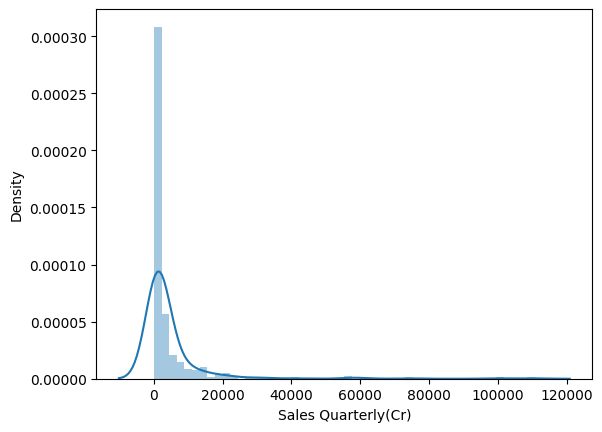

In [ ]:
sns.distplot(data1['Sales Quarterly(Cr)'])

<Axes: ylabel='Sales Quarterly(Cr)'>

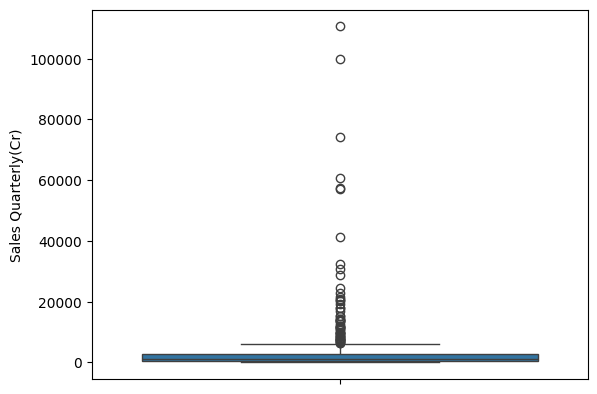

In [ ]:
sns.boxplot(data1['Sales Quarterly(Cr)'])

In [ ]:
mn1 = data1['Market Cap(Cr)'].mean()
md1 = data1['Sales Quarterly(Cr)'].median()
print(f"Mean = {mn1},\nMedian = {md1}")

Mean = 27708.961086065574,
Median = 1278.3


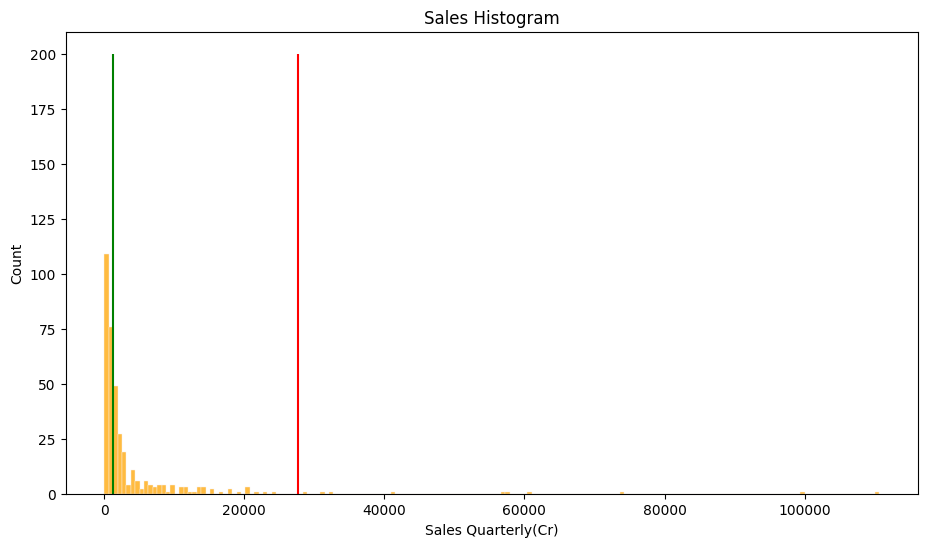

In [ ]:
plt.figure(figsize = (11,6))
sns.histplot(data = data1, x= 'Sales Quarterly(Cr)', color = 'orange', edgecolor = 'linen')
plt.title("Sales Histogram")
plt.vlines(mn1, color = 'red', ymin = 0, ymax = 200, label = 'Mean')
plt.vlines(md1, color = 'green', ymin = 0, ymax = 200, label = 'Median')
plt.show()

Sales column is also right skewed and based on histogram we can observe using median is better way to impute missing values as using mean would be biased result.

In [ ]:
data1['Sales Quarterly(Cr)'] = data1['Sales Quarterly(Cr)'].fillna(md1)
data1['Sales Quarterly(Cr)'].isnull().sum()

0

In [ ]:
data1.info()
data_outliers= data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.No.                488 non-null    int64  
 1   Name                 488 non-null    object 
 2   Market Cap(Cr)       488 non-null    float64
 3   Sales Quarterly(Cr)  488 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [ ]:
col_list = ['Market Cap(Cr)', 'Sales Quarterly(Cr)']
def outliers(df,cl):
  Q1 = np.percentile(df[cl],25)
  Q3 = np.percentile(df[cl],75)
  print(f"Q1 = {Q1}, Q3 = {Q3}")
  IQR = Q3 - Q1
  lower_quartile = Q1 - 1.5 * IQR
  upper_quartile = Q3 + 1.5 * IQR
  print(f"IQR = {IQR}\n lower_quartile = {lower_quartile}\n upper_quartile = {upper_quartile}")
  ls = df.index[(df[cl]<lower_quartile) | (df[cl]>upper_quartile)]
  return ls

In [ ]:
index_list = []
for col in ['Market Cap(Cr)', 'Sales Quarterly(Cr)']:
  index_list.extend(outliers(data1,col))

Q1 = 4879.6125, Q3 = 23400.815000000002
IQR = 18521.202500000003
 lower_quartile = -22902.191250000007
 upper_quartile = 51182.61875000001
Q1 = 725.7325000000001, Q3 = 2084.0975
IQR = 1358.3649999999998
 lower_quartile = -1311.8149999999996
 upper_quartile = 4121.6449999999995


In [ ]:
index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 34,
 35,
 37,
 38,
 39,
 40,
 44,
 45,
 46,
 47,
 48,
 53,
 54,
 55,
 57,
 58,
 81,
 88,
 101,
 103,
 106,
 113,
 118,
 122,
 123,
 125,
 128,
 133,
 138,
 152,
 165,
 167,
 192,
 202,
 204,
 210,
 236,
 246,
 259,
 316,
 320,
 328,
 334,
 405,
 410,
 441,
 444]

In [ ]:
index_list = set(index_list)
print(len(index_list))
data2 = data1.drop(index_list)

94


In [ ]:
data2.shape

(394, 4)

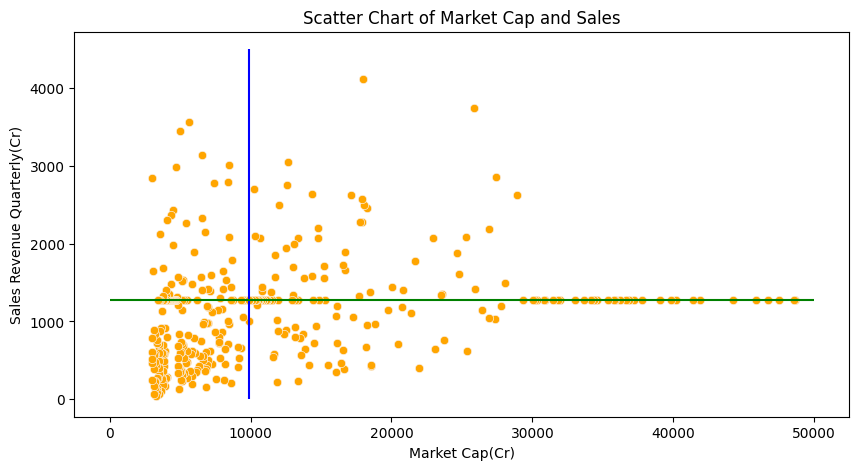

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = data2, x= 'Market Cap(Cr)', y= 'Sales Quarterly(Cr)', color = 'orange', edgecolor = 'linen')
plt.title("Scatter Chart of Market Cap and Sales")
plt.ylabel("Sales Revenue Quarterly(Cr)")
plt.vlines(md, color = 'blue',ymin = 0, ymax = 4500, label = 'Median')
plt.hlines(md1, color = 'green',xmin = 0,xmax = 50000, label = 'Median')
plt.show()

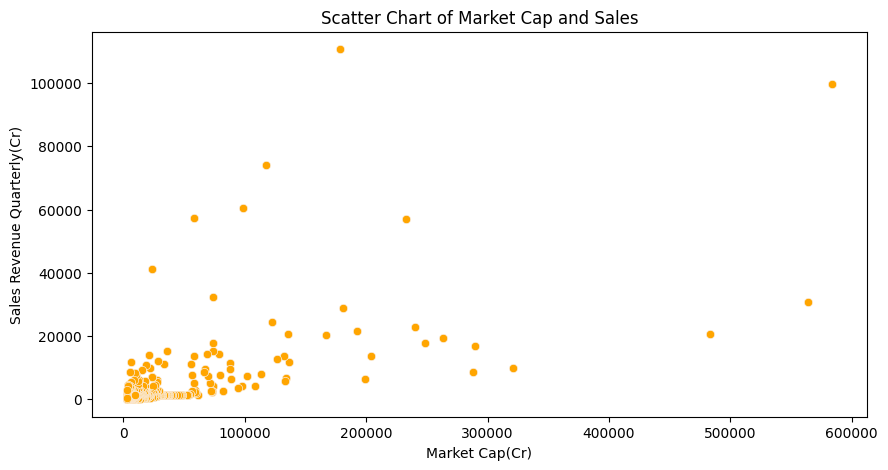

In [ ]:
### this is scatter plot of raw data which contains null values and outliers

plt.figure(figsize = (10,5))
sns.scatterplot(data = null_data, x= 'Market Cap(Cr)', y= 'Sales Quarterly(Cr)', color = 'orange', edgecolor = 'linen')
plt.title("Scatter Chart of Market Cap and Sales")
plt.ylabel("Sales Revenue Quarterly(Cr)")
plt.show()

We can observe that there are many organisations where their sales are independent of market cap like some companies with lower market cap also have higher sales and vice versa.
And there are some outliers which we can see in raw data where some companies are performing extraordinarily in the quarter,

In [ ]:
data2.reset_index(inplace = True)
data2

,index,S.No.,Name,Market Cap(Cr),Sales Quarterly(Cr)
0,63,64,Interglobe Aviat,48621.37,1278.30
1,64,65,Cipla,48577.43,1278.30
2,65,66,Piramal Enterp.,47483.97,1278.30
3,66,67,United Spirits,46725.05,1278.30
4,67,68,Pidilite Inds.,45855.50,1278.30
...,...,...,...,...,...
389,483,496,Lak. Vilas Bank,3029.57,790.17
390,484,497,NOCIL,3026.26,249.27
391,485,498,Orient Cement,3024.32,511.53
392,486,499,Natl.Fertilizer,3017.07,2840.75


In [ ]:
data2 = data2.drop(columns = ['index'], axis = 1)

In [ ]:
null_data.to_csv("Data with Nulls")
data2.to_csv("Processed Data")

In [ ]:
null_data

,S.No.,Name,Market Cap(Cr),Sales Quarterly(Cr)
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75


In [ ]:
a = []
b = []
c = []
d = []
e = []
f = []
g = []
h = []
for index,i in enumerate(data_outliers['Market Cap(Cr)']):
  if i <= 5000:
    a.append(index)
  elif 5000 < i <= 10000:
    b.append(index)
  elif 10000 < i <= 15000:
    c.append(index)
  elif 15000 < i <= 20000:
    d.append(index)
  elif 20000 < i <= 25000:
    e.append(index)
  elif 25000 < i <= 30000:
    f.append(index)
  elif 30000 < i <= 40000:
    g.append(index)
  else:
    h. append(index)


In [ ]:
for i in data_outliers.index:
  if i in a:
    data_outliers.loc[i,'Categeory'] = "p"
  elif i in b:
    data_outliers.loc[i,'Categeory'] = "q"
  elif i in c:
    data_outliers.loc[i,'Categeory'] = "r"
  elif i in d:
    data_outliers.loc[i,'Categeory'] = "s"
  elif i in e:
    data_outliers.loc[i,'Categeory'] = "t"
  elif i in f:
    data_outliers.loc[i,'Categeory'] = "u"
  elif i in g:
    data_outliers.loc[i,'Categeory'] = "v"
  elif i in h:
    data_outliers.loc[i,'Categeory'] = "w"

In [ ]:
ls = ['Market Cap(Cr)','Sales Quarterly(Cr)']
grouped_data = data_outliers.groupby("Categeory")[ls].sum()
grouped_data.reset_index(inplace = True)
grouped_data

,Categeory,Market Cap(Cr),Sales Quarterly(Cr)
0,p,502198.77,133225.85
1,q,862047.39,163214.61
2,r,850973.10,117475.47
3,s,582971.61,72575.19
4,t,450494.92,101261.63
5,u,461043.94,51290.34
6,v,891471.73,57306.09
7,w,8920771.55,1065413.27


In [ ]:
data_outliers.to_csv("Data with outliers")